Problem statement

Your Client, a chain of hospitals aiming to create the next generation of healthcare for its patients, has retained McKinsey to help achieve its vision. The company brings the best doctors and enables them to provide proactive health care for its patients. One such investment is a Center of Data Science Excellence.

In this case, your client wants to have study around one of the critical disease "Stroke". Stroke is a disease that affects the arteries leading to and within the brain. A stroke occurs when a blood vessel that carries oxygen and nutrients to the brain is either blocked by a clot or bursts (or ruptures). When that happens, part of the brain cannot get the blood (and oxygen) it needs, so it and brain cells die.

Over the last few years, the Client has captured several health, demographic and lifestyle details about its patients. This includes details such as age and gender, along with several health parameters (e.g. hypertension, body mass index) and lifestyle related variables (e.g. smoking status, occupation type).

The Client wants you to predict the probability of stroke happening to their patients. This will help doctors take proactive health measures for these patients.

 

Import libraries

In [693]:
import pandas as pd
import numpy as np
import seaborn as sns

Load and read datasets

In [694]:
#Load datasets
train = pd.read_csv("https://raw.githubusercontent.com/TracyRenee61/AV-Stroke/main/train_ajEneEa.csv")
test = pd.read_csv("https://raw.githubusercontent.com/TracyRenee61/AV-Stroke/main/test_v2akXPA.csv")
sample = pd.read_csv("https://raw.githubusercontent.com/TracyRenee61/AV-Stroke/main/sample_submission_1.csv")

In [695]:
train

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


In [696]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                41938 non-null  float64
 10  smoking_status     30108 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


In [697]:
test

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,36306,Male,80.0,0,0,Yes,Private,Urban,83.84,21.1,formerly smoked
1,61829,Female,74.0,0,1,Yes,Self-employed,Rural,179.50,26.0,formerly smoked
2,14152,Female,14.0,0,0,No,children,Rural,95.16,21.2,NaN
3,12997,Male,28.0,0,0,No,Private,Urban,94.76,23.4,NaN
4,40801,Female,63.0,0,0,Yes,Govt_job,Rural,83.57,27.6,never smoked
...,...,...,...,...,...,...,...,...,...,...,...
18596,67353,Male,20.0,0,0,No,Private,Rural,74.43,18.4,formerly smoked
18597,362,Male,61.0,0,0,Yes,Govt_job,Rural,211.55,31.6,smokes
18598,29839,Female,79.0,0,0,Yes,Private,Rural,125.74,29.4,never smoked
18599,6438,Male,55.0,0,0,Yes,Govt_job,Rural,69.46,33.8,never smoked


In [698]:
sample

,id,stroke
0,36306,0
1,61829,0
2,14152,0
3,12997,0
4,40801,0
...,...,...
18596,67353,0
18597,362,0
18598,29839,0
18599,6438,0


Check for null values

In [699]:
train.isnull().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

In [700]:
test.isnull().sum()

id                      0
gender                  0
age                     0
hypertension            0
heart_disease           0
ever_married            0
work_type               0
Residence_type          0
avg_glucose_level       0
bmi                   591
smoking_status       5751
dtype: int64

Impute missing values

In [701]:
train["bmi"] = train["bmi"].fillna(train['bmi'].median())
train["smoking_status"] = train["smoking_status"].fillna(train["smoking_status"].mode()[0])


test["bmi"] = test["bmi"].fillna(test['bmi'].median())
test["smoking_status"] = test["smoking_status"].fillna(test["smoking_status"].mode()[0])

Analyse data

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


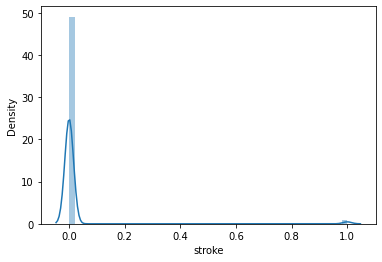

In [702]:
sns.distplot(train['stroke'])

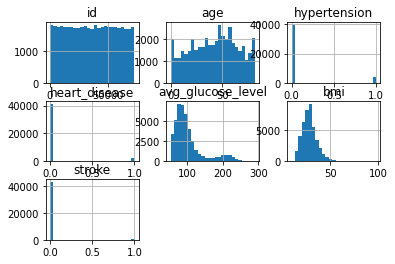

In [703]:
#create histograms of classes
# create histograms of all variables
from pandas import read_csv
from matplotlib import pyplot

# create a histogram plot of each variable
train.hist(bins=25)
# show the plot
pyplot.show()

In [704]:
import collections
from collections import Counter

counter = Counter(train.stroke)
for k,v in counter.items():
	per = v / len(train.stroke) * 100
	print('Class=%s, Count=%d, Percentage=%.3f%%' % (k, v, per))

Class=0, Count=42617, Percentage=98.196%
Class=1, Count=783, Percentage=1.804%


In [705]:
result = train.groupby('stroke')['stroke'].count()
result/len(train)*100

stroke
0    98.195853
1     1.804147
Name: stroke, dtype: float64

In [706]:
gender = train.groupby('gender')['stroke'].count().reset_index()
gender

,gender,stroke
0,Female,25665
1,Male,17724
2,Other,11


In [707]:
married = train.groupby('ever_married')['stroke'].count().reset_index()
married

,ever_married,stroke
0,No,15462
1,Yes,27938


In [708]:
Residence = train.groupby('Residence_type')['stroke'].count().reset_index()
Residence

,Residence_type,stroke
0,Rural,21644
1,Urban,21756


In [709]:
work = train.groupby('work_type')['stroke'].count().reset_index()
work

,work_type,stroke
0,Govt_job,5440
1,Never_worked,177
2,Private,24834
3,Self-employed,6793
4,children,6156


In [710]:
smoker = train.groupby('smoking_status')['stroke'].count().reset_index()
smoker

,smoking_status,stroke
0,formerly smoked,7493
1,never smoked,29345
2,smokes,6562


Ordinal encoder

In [711]:
train.dtypes[train.dtypes != 'int64'][train.dtypes != 'float64']

gender            object
ever_married      object
work_type         object
Residence_type    object
smoking_status    object
dtype: object

In [712]:
#ordinal encoder
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()

train.gender = enc.fit_transform(train.gender.values.reshape(-1,1))
train.ever_married = enc.fit_transform(train.ever_married.values.reshape(-1,1))
train.work_type = enc.fit_transform(train.work_type.values.reshape(-1,1))
train.Residence_type = enc.fit_transform(train.Residence_type.values.reshape(-1,1))
train.smoking_status = enc.fit_transform(train.smoking_status.values.reshape(-1,1))

test.gender = enc.fit_transform(test.gender.values.reshape(-1,1))
test.ever_married = enc.fit_transform(test.ever_married.values.reshape(-1,1))
test.work_type = enc.fit_transform(test.work_type.values.reshape(-1,1))
test.Residence_type = enc.fit_transform(test.Residence_type.values.reshape(-1,1))
test.smoking_status = enc.fit_transform(test.smoking_status.values.reshape(-1,1))

Assign X, y and X_test

In [713]:
id = test.id

y = train.stroke
X = train.drop(['id', 'stroke'], axis=1)
X_test = test.drop(['id'], axis=1)

In [714]:
y

0        0
1        0
2        0
3        0
4        0
        ..
43395    0
43396    0
43397    0
43398    0
43399    0
Name: stroke, Length: 43400, dtype: int64

2D diagram

In [715]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = scaler.fit_transform(X) # normalizing the features
X_test = scaler.transform(X_test)
X.shape

(43400, 10)

In [716]:
np.mean(X),np.std(X)

(-2.6653538567222192e-17, 1.0)

In [717]:
feat_cols = ['feature'+str(i) for i in range(X.shape[1])]
feat_cols

['feature0',
 'feature1',
 'feature2',
 'feature3',
 'feature4',
 'feature5',
 'feature6',
 'feature7',
 'feature8',
 'feature9']

In [718]:
normalised = pd.DataFrame(X,columns=feat_cols)
normalised

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9
0,1.201081,-1.741517,-0.321296,-0.223342,-1.344203,1.659945,-1.002584,-0.217176,-1.384161,0.037722
1,1.201081,0.700823,3.112398,-0.223342,0.743935,-0.169637,0.997423,-0.383258,1.390824,0.037722
2,-0.830841,-1.519486,-0.321296,-0.223342,-1.344203,-0.169637,0.997423,0.148621,-1.436520,0.037722
3,-0.830841,1.233697,-0.321296,-0.223342,0.743935,-0.169637,-1.002584,-0.822123,0.958869,-1.720761
4,1.201081,-1.253049,-0.321296,-0.223342,-1.344203,-1.084428,-1.002584,1.317458,-1.240176,0.037722
...,...,...,...,...,...,...,...,...,...,...
43395,-0.830841,-1.430674,-0.321296,-0.223342,-1.344203,1.659945,0.997423,-1.063359,-1.070012,0.037722
43396,-0.830841,0.612011,-0.321296,-0.223342,0.743935,-1.999219,0.997423,2.531294,3.511331,-1.720761
43397,-0.830841,1.766571,3.112398,-0.223342,0.743935,-0.169637,0.997423,-0.290939,0.042600,-1.720761
43398,1.201081,-0.098488,-0.321296,-0.223342,0.743935,-0.169637,0.997423,-0.123465,0.605451,0.037722


In [719]:
from sklearn.decomposition import PCA

pca_stroke = PCA(n_components=2)
principalComponents_stroke = pca_stroke.fit_transform(X)

In [720]:
principal_stroke_Df = pd.DataFrame(data = principalComponents_stroke, columns = ['principal component 1', 'principal component 2'])
principal_stroke_Df

,principal component 1,principal component 2
0,-2.961899,1.402529
1,1.983916,0.877649
2,-2.066738,-0.241450
3,1.292416,-0.912997
4,-1.267952,0.817080
...,...,...
43395,-2.840705,0.000795
43396,3.434577,-0.936697
43397,2.244746,0.500848
43398,0.430538,0.011449


In [721]:
print('Explained variation per principal component: {}'.format(pca_stroke.explained_variance_ratio_))

Explained variation per principal component: [0.24861224 0.1203325 ]


<Figure size 432x288 with 0 Axes>

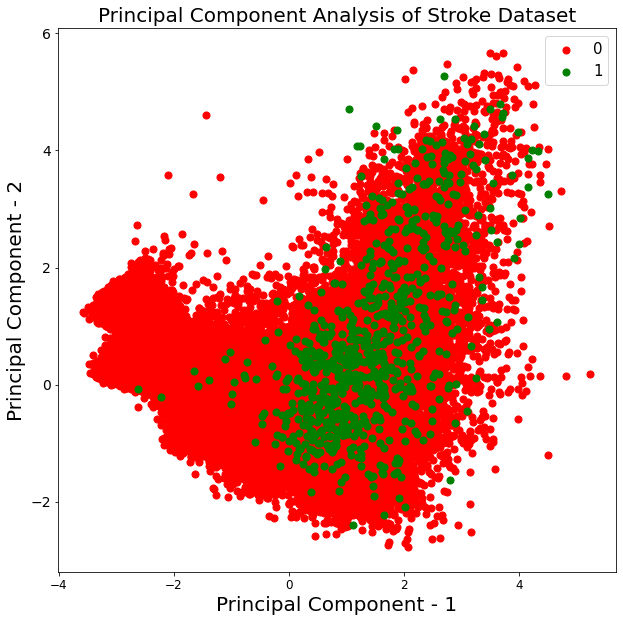

In [722]:
import matplotlib.pyplot as plt

plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Stroke Dataset",fontsize=20)
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = y == target
    plt.scatter(principal_stroke_Df.loc[indicesToKeep, 'principal component 1'], 
                principal_stroke_Df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

3D Graph

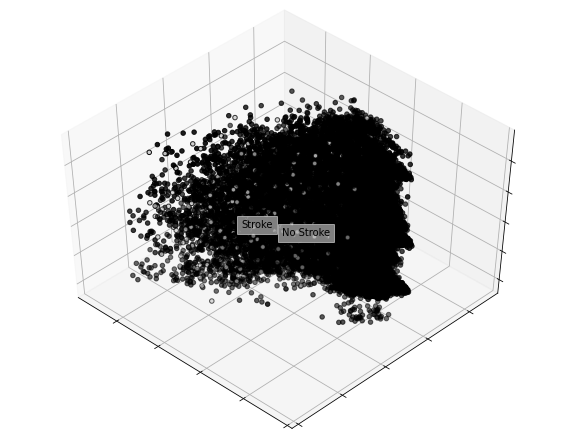

In [723]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition

fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

for name, label in [('No Stroke', 0), ('Stroke', 1)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(),name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0, 3, 4, 5, 6, 7]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral,
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

In [724]:
X = pca.inverse_transform(X)

Split X for training and validation

In [725]:
#split training set for training and testing
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=1, test_size=0.10, stratify=y, shuffle=True)
X_train.shape, X_val.shape, y_train.shape, y_val.shape, X_test.shape

((39060, 10), (4340, 10), (39060,), (4340,), (18601, 10))

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


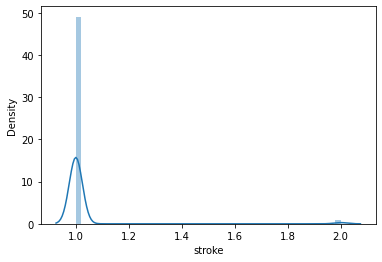

In [726]:
sns.distplot(y_val)

Class weights

In [727]:
from sklearn.utils import class_weight
class_weights = dict(zip(np.unique(y_train), class_weight.compute_class_weight('balanced',np.unique(y_train), y_train)))

Define model

In [728]:
from sklearn.svm import LinearSVC

model = LinearSVC(class_weight='balanced', dual=True, max_iter=680, C=10).fit(X_train, y_train)
print(model.score(X_train, y_train))

0.9668714797747056


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [729]:
#print the tunable parameters (They were not tuned in this example, everything kept as default)
params = model.get_params()
print(params)

{'C': 10, 'class_weight': 'balanced', 'dual': True, 'fit_intercept': True, 'intercept_scaling': 1, 'loss': 'squared_hinge', 'max_iter': 680, 'multi_class': 'ovr', 'penalty': 'l2', 'random_state': None, 'tol': 0.0001, 'verbose': 0}


Predict on validation set

In [730]:
y_pred = model.predict(X_val)

df=pd.DataFrame({'Actual': y_val, 'Predicted':y_pred.ravel()})
df

,Actual,Predicted
1343,1.0,1.0
7952,1.0,1.0
17711,1.0,1.0
10598,1.0,1.0
40313,1.0,1.0
...,...,...
7203,1.0,1.0
17311,1.0,1.0
25737,1.0,1.0
20690,1.0,1.0


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


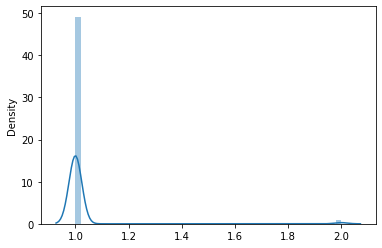

In [731]:
sns.distplot(y_pred)

In [732]:
import collections

print(collections.Counter(y_val))

Counter({1.0: 4262, 2.0: 78})


In [733]:
print(collections.Counter(y_pred.ravel()))

Counter({1.0: 4266, 2.0: 74})


In [734]:
#Create a confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_val, y_pred)

array([[4193,   69],
       [  73,    5]])

In [735]:
#Accuracy statistics
import sklearn.metrics as metrics
from sklearn.metrics import classification_report

print('Accuracy Score:', metrics.accuracy_score(y_val, y_pred))  
#Create classification report
class_report=classification_report(y_val, y_pred)
print(class_report)

Accuracy Score: 0.9672811059907834
              precision    recall  f1-score   support

         1.0       0.98      0.98      0.98      4262
         2.0       0.07      0.06      0.07        78

    accuracy                           0.97      4340
   macro avg       0.53      0.52      0.52      4340
weighted avg       0.97      0.97      0.97      4340



Predict on test set

In [736]:
predictions = model.predict(X_test)
predictions

array([1., 1., 1., ..., 1., 1., 1.])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


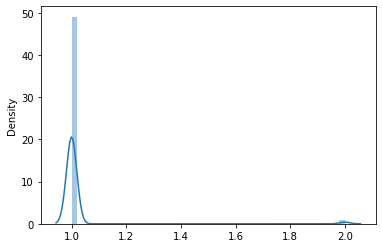

In [737]:
sns.distplot(predictions)

In [738]:
submission = pd.DataFrame({
        "id": id,
        "stroke": predictions.ravel()
    })
submission.to_csv('submission.csv', index=False)
submission

,id,stroke
0,36306,1.0
1,61829,1.0
2,14152,1.0
3,12997,1.0
4,40801,1.0
...,...,...
18596,67353,1.0
18597,362,1.0
18598,29839,1.0
18599,6438,1.0
